In [1]:
# !pip install --upgrade pip
# %pip install pandas
# !pip install -U matplotlib
# %pip install seaborn
# %pip install scipy
# %pip install -U scikit-learn
    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

df_train = pd.read_csv('./train.csv')
df_train
#print(df_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
#missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [3]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [4]:
#descriptive statistic summery
df_train['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

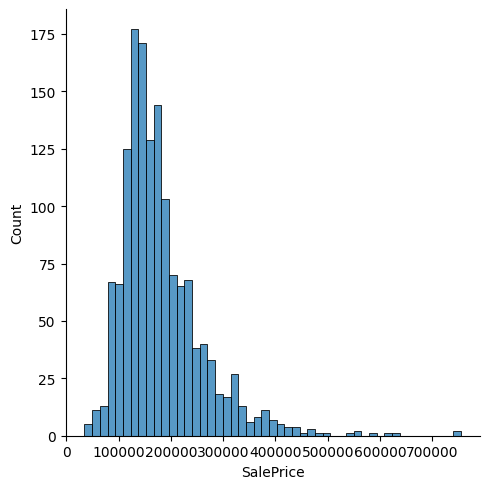

In [5]:
#histogram
sns.displot(df_train['SalePrice'])

In [6]:
#skewness and kurtosis
print(f"skrewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

skrewness: 1.8819429948035529
Kurtosis: 6.529263049673958


In [7]:
#Standardizing data
salePrice_array = df_train['SalePrice'].to_numpy()[:, np.newaxis]  # Convert to 2D array
salePrice_scaled = StandardScaler().fit_transform(salePrice_array)
low_range = salePrice_scaled[salePrice_scaled[:,0].argsort()][:10]
high_range = salePrice_scaled[salePrice_scaled[:,0].argsort()][:-10]
print(f"Low Range \n {low_range}")
print(f"High Range \n {high_range}")

# Explaination
"""
1. Extracting and Reshaping the 'SalePrice' Series:
-->df_train['SalePrice']: This selects the 'SalePrice' column (Series) from your DataFrame df_train.
-->.to_numpy(): This converts the Series (which is a pandas data structure) into a regular NumPy array. NumPy arrays are more efficient for numerical computations.
-->[:, np.newaxis]: This part reshapes the 1D NumPy array (to_numpy()) into a 2D array with a single column.
-->[:,] selects all rows (':') and applies the operation to each row.
-->np.newaxis inserts a new axis (dimension) at the specified position (here, the second dimension). This creates a column vector even if the original data was a single array.

2. Standardizing the 'SalePrice' Data:
-->StandardScaler(): This creates an object from the StandardScaler class in scikit-learn's preprocessing module. This scaler transforms data to have zero mean and unit variance.
-->.fit_transform(salePrice_array): This applies the standard scaler to the salePrice_array. The .fit part calculates the mean and standard deviation from the data, and the .transform part uses those values to center and scale the data.

3. Sorting and Extracting Low and High Ranges:
>>>salePrice_scaled[salePrice_scaled[:, 0].argsort()]: This part sorts the salePrice_scaled data based on the values in the first column (assuming the first column contains the scaled prices). Here's a breakdown:
-->[:, 0]: Selects the first column (0th index) of salePrice_scaled.
-->.argsort(): This function returns the indices that would sort the elements of the array along the specified axis (axis=0 for rows here). So, it gives the order in which the elements should be arranged to be sorted.
-->[salePrice_scaled...]: This uses the indices from .argsort() to reorder the rows of salePrice_scaled according to the sorted values in the first column.
-->[:10]: This selects the first 10 elements (rows) from the sorted array, representing the low range of sale prices.
-->[:-10]: This selects all elements except the last 10 (using negative slicing) from the sorted array, representing the high range of sale prices.
"""

Low Range 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
High Range 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 ...
 [ 3.57582371]
 [ 3.59470548]
 [ 3.70170215]]


"\n1. Extracting and Reshaping the 'SalePrice' Series:\n-->df_train['SalePrice']: This selects the 'SalePrice' column (Series) from your DataFrame df_train.\n-->.to_numpy(): This converts the Series (which is a pandas data structure) into a regular NumPy array. NumPy arrays are more efficient for numerical computations.\n-->[:, np.newaxis]: This part reshapes the 1D NumPy array (to_numpy()) into a 2D array with a single column.\n-->[:,] selects all rows (':') and applies the operation to each row.\n-->np.newaxis inserts a new axis (dimension) at the specified position (here, the second dimension). This creates a column vector even if the original data was a single array.\n\n2. Standardizing the 'SalePrice' Data:\n-->StandardScaler(): This creates an object from the StandardScaler class in scikit-learn's preprocessing module. This scaler transforms data to have zero mean and unit variance.\n-->.fit_transform(salePrice_array): This applies the standard scaler to the salePrice_array. The 

# Bivariate analysis

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

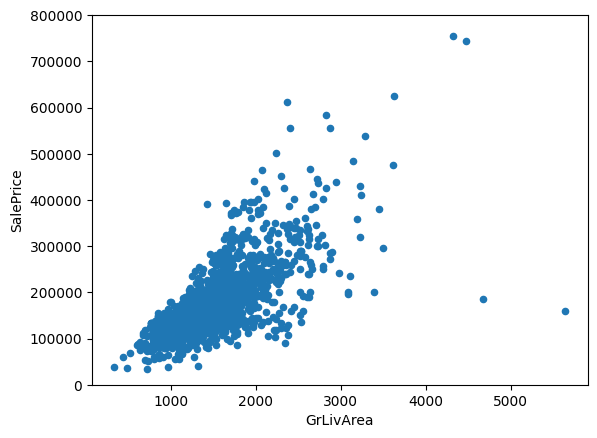

In [8]:
#bivariate  analysis salePrice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [9]:
# deleting points
df_train.sort_value(by = "GrLivArea", ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
df_train = df_train.drop(df_train[df_train['Id']==524].index)

AttributeError: 'DataFrame' object has no attribute 'sort_value'

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

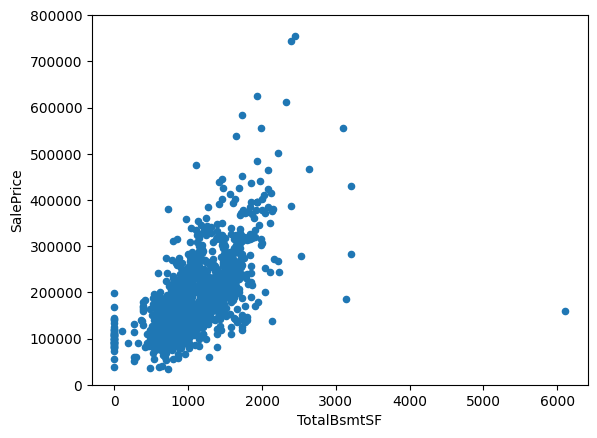

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

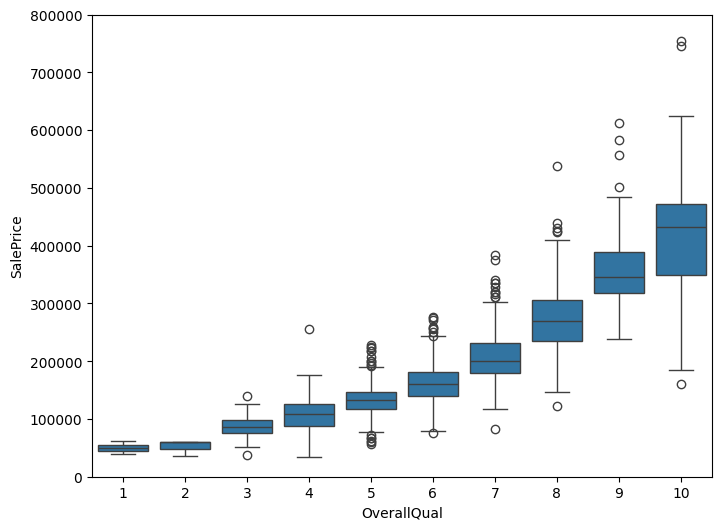

In [ ]:
#box plot 
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data= data)
fig.axis(ymin = 0, ymax=800000)

# Multivariate Analysis

<Axes: >

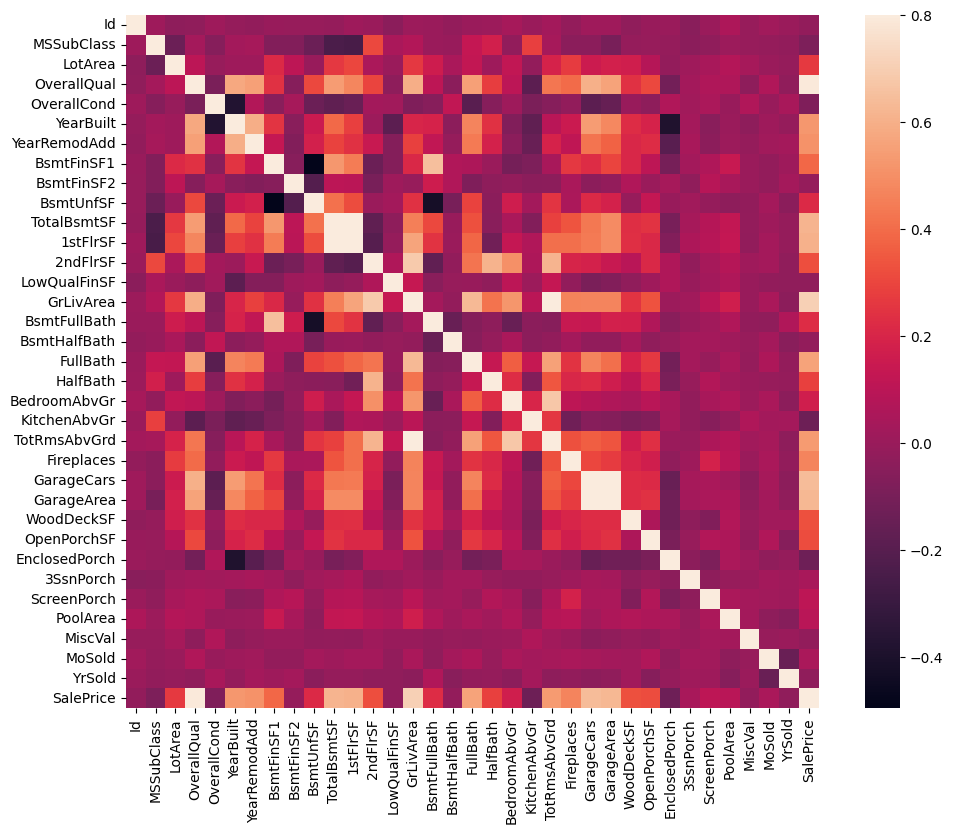

In [ ]:

corrmat = df_train.corr(numeric_only = True)
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square = True)

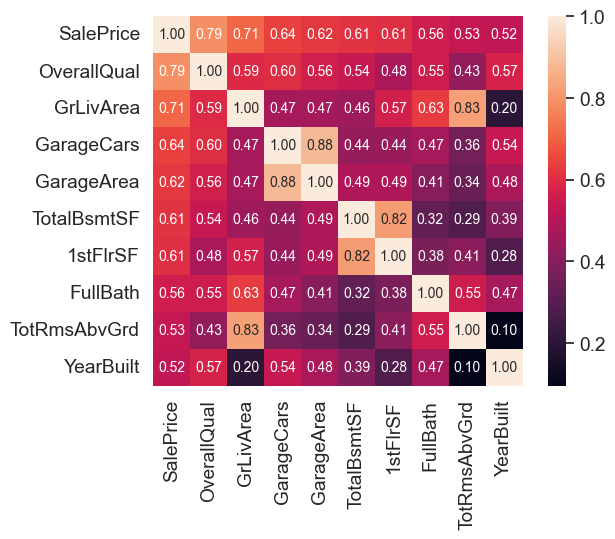

In [ ]:
#saleprice correlative matrix
k=10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot=True, square = True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

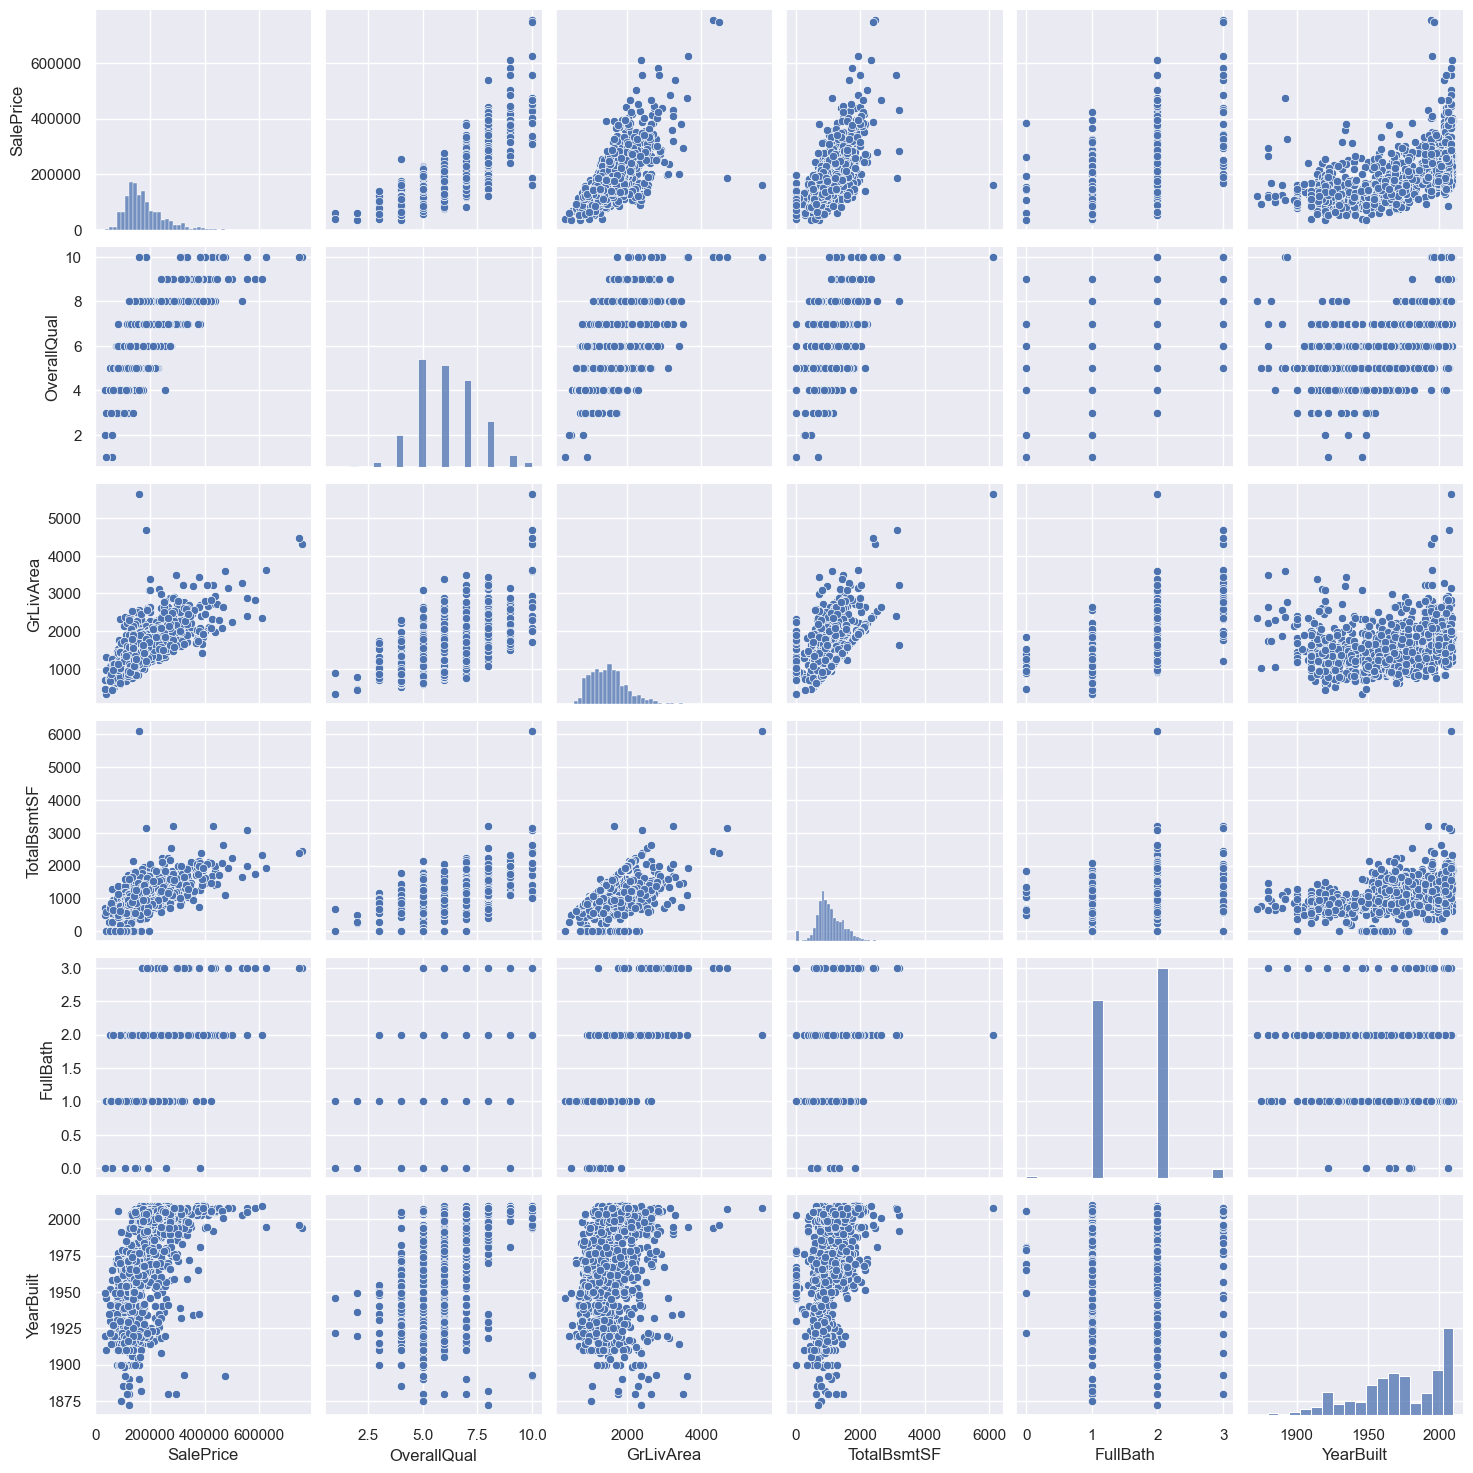

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()